In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

Data Source: https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420?select=pokedex_%28Update_05.20%29.csv

The topic I have chosen is Pokemon which is a video game that I used to play a lot while growing up. The dataset that I have found consists of every pokemon released up to the 8th generation with relevant information such as type, generation, and stats.
Questions to explore
1. What is the most prevalent main type (fire,water,grass etc.)  of pokemon in each generation
2. Does the Pokemon's weight affect the catch rate. I would assume that larger pokemon would have lower catch rates. Follow up question: Does the height affect catch rate
3. Do the pokemon with the highest combined traits have something in common?


## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

In [ ]:
#Phase 1
#import Libraries
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb

#reading the csv file into a data frame
# I directly uploaded the csv file onto colab
df = pd.read_csv("pokemon.csv")
print(df)
#exploring the data
df.head()


      Unnamed: 0  pokedex_number  ... against_steel against_fairy
0              0               1  ...           1.0           0.5
1              1               2  ...           1.0           0.5
2              2               3  ...           1.0           0.5
3              3               3  ...           1.0           0.5
4              4               4  ...           0.5           0.5
...          ...             ...  ...           ...           ...
1023        1023             888  ...           2.0           1.0
1024        1024             889  ...           0.5           1.0
1025        1025             889  ...           1.0           2.0
1026        1026             890  ...           1.0           1.0
1027        1027             890  ...           1.0           1.0

[1028 rows x 51 columns]


,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [ ]:
df.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [ ]:
#after I looked through all of the data, there were many columns that I found to be irrelevant to the topics that I wanted to explore
#removing columns
df= df.drop(['german_name', 'japanese_name','species','abilities_number', 
        'ability_1', 'ability_2','ability_hidden','base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],axis=1)

In [ ]:
#Now that I have removed the columns that I don't feel are necessary I'll begin to investigate some of my initial questions

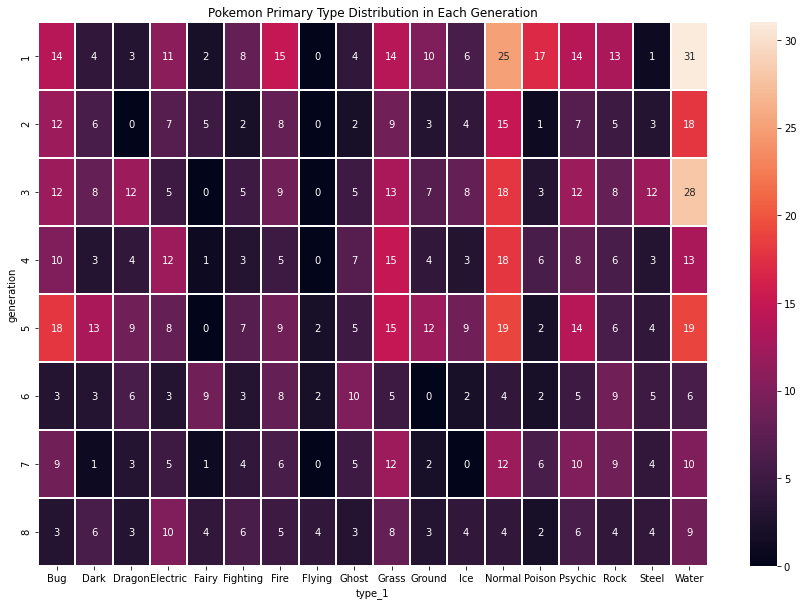

In [ ]:
#Question 1 - What is the most prevalent type in each generation
# I used a crosstab and a seaborn heatmap
type = pd.crosstab(df['generation'],df['type_1'])
type
fig,ax = plt.subplots(figsize = (15,10))
plt.title("Pokemon Primary Type Distribution in Each Generation")
sb.heatmap(type,annot = True, linewidths=1)

<BarContainer object of 18 artists>

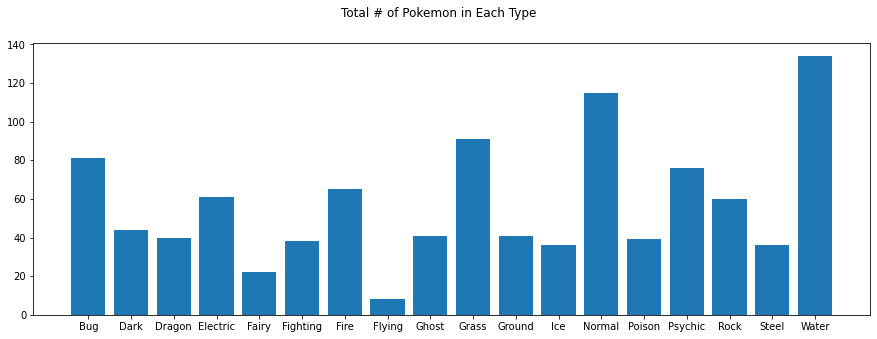

In [ ]:
totaltype = df.groupby('type_1').count()
typeindex = totaltype.index
fig,ax = plt.subplots(figsize = (15,5))
fig.suptitle("Total # of Pokemon in Each Type")
plt.bar(typeindex,totaltype.name)
#after seeing the distribution of each generation I wanted to see the overall number

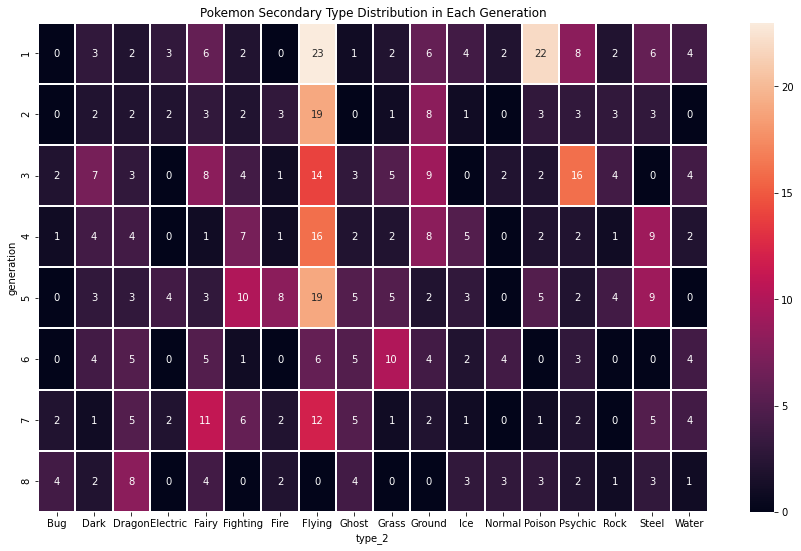

In [ ]:
#Follow up secondary typing
type2 = pd.crosstab(df['generation'],df['type_2'])
type2
fig,ax = plt.subplots(figsize = (15,9))
plt.title("Pokemon Secondary Type Distribution in Each Generation")
sb.heatmap(type2,annot = True, linewidths=1)

<BarContainer object of 18 artists>

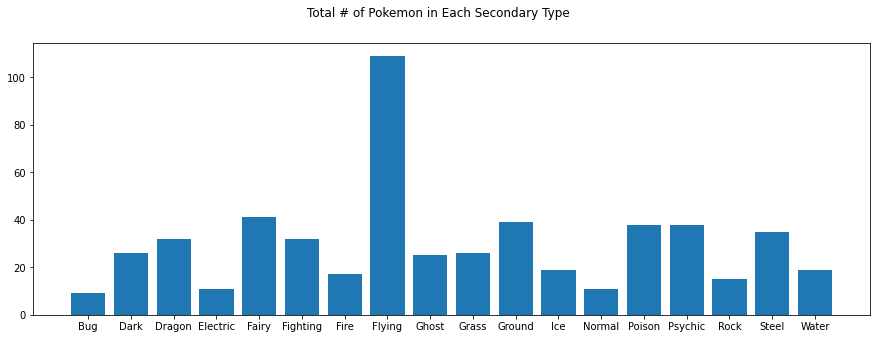

In [ ]:
totaltype2 = df.groupby('type_2').count()
typeindex2 = totaltype2.index
fig,ax = plt.subplots(figsize = (15,5))
fig.suptitle("Total # of Pokemon in Each Secondary Type")
plt.bar(typeindex2,totaltype2.name)

Text(0, 0.5, 'Catch Rate')

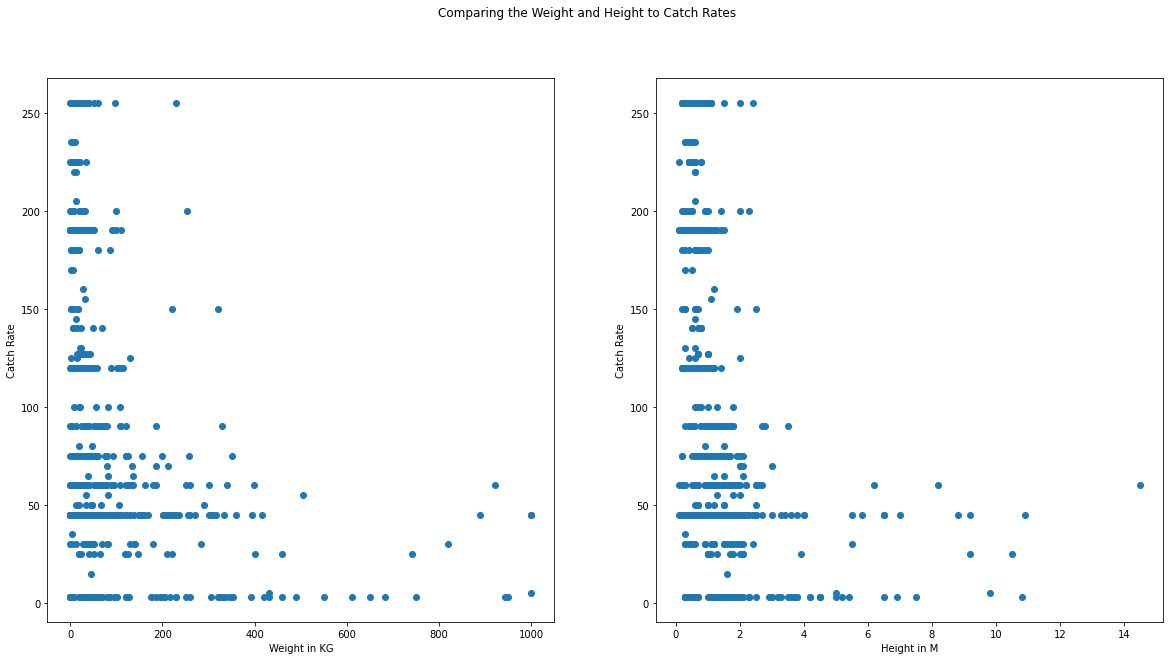

In [ ]:
#Q2 Do the height/weight have a correlation to catch rate
#examining the heaviest pokemon
weight = df.sort_values(by = 'weight_kg',ascending = False)
weight
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing the Weight and Height to Catch Rates")
# plotting the weight to catch rate
ax1.scatter(df['weight_kg'], df['catch_rate'], marker='o')
ax1.set_xlabel('Weight in KG')
ax1.set_ylabel('Catch Rate')
# plotting height to catch rate 
ax2.scatter(df['height_m'], df['catch_rate'], marker='o')
ax2.set_xlabel('Height in M')
ax2.set_ylabel('Catch Rate')


<BarContainer object of 10 artists>

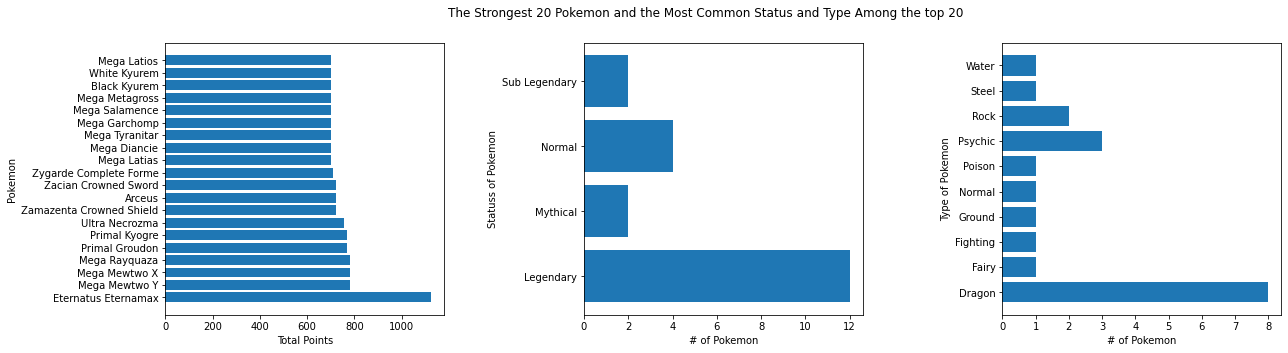

In [ ]:
#Q3 Do the pokemon with the highest combined traits have type/status in common?
#sort pokemon by highest traits
hightraits = df.sort_values(by='total_points', ascending = False)
#take the top 20
top20 = hightraits.head(20)
top20
fig, (q3ax1,q3ax2,q3ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace=.5)
fig.suptitle("The Strongest 20 Pokemon and the Most Common Status and Type Among the top 20")
#bar graph
fig.set_size_inches(20,5)
q3ax1.set_xlabel("Total Points")
q3ax1.set_ylabel("Pokemon")
q3ax1.barh(top20['name'],top20['total_points'],align = 'center')
# testing to see if they have a status in common
status20 = top20.groupby('status').count()
status20
#it seems that almost half of the strongest pokemon are dragons
q3ax2.set_xlabel("# of Pokemon")
q3ax2.set_ylabel("Statuss of Pokemon")
q3ax2.barh(status20.index,status20.name)
type20 = top20.groupby('type_1').count()
type20
#it seems that almost half of the strongest pokemon are dragons
q3ax3.set_xlabel("# of Pokemon")
q3ax3.set_ylabel("Type of Pokemon")
q3ax3.barh(type20.index,type20.name)


<BarContainer object of 4 artists>

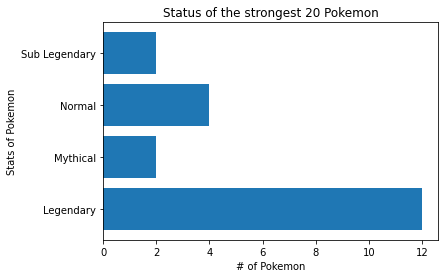

In [ ]:
status20 = top20.groupby('status').count()
status20
#it seems that almost half of the strongest pokemon are dragons
plt.title("Status of the strongest 20 Pokemon")
plt.xlabel("# of Pokemon")
plt.ylabel("Stats of Pokemon")
plt.barh(status20.index,status20.name)

<BarContainer object of 10 artists>

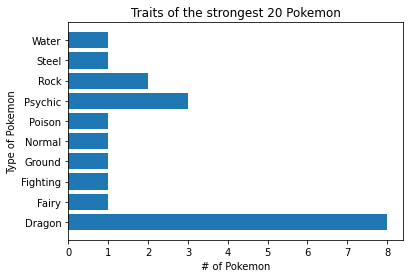

In [ ]:
type20 = top20.groupby('type_1').count()
type20
#it seems that almost half of the strongest pokemon are dragons
plt.title("Traits of the strongest 20 Pokemon")
plt.set_xlabel("# of Pokemon")
plt.set_ylabel("Type of Pokemon")
plt.barh(type20.index,type20.name)

In [ ]:
#I wanted to repeat the process for the top 20 on the bottom 20

<BarContainer object of 7 artists>

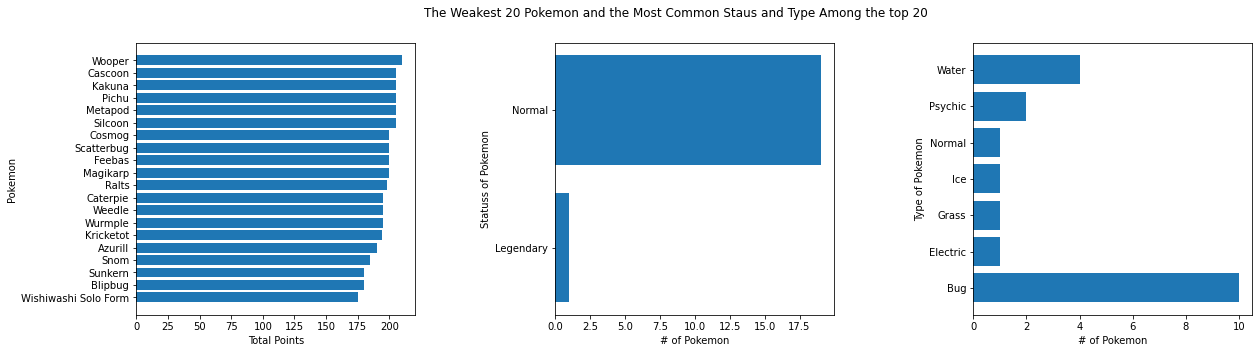

In [ ]:
bottraits = df.sort_values(by='total_points')
#take the top 20
bot20 = bottraits.head(20)
bot20
fig, (q3ax1,q3ax2,q3ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace=.5)
fig.suptitle("The Weakest 20 Pokemon and the Most Common Staus and Type Among the top 20")
#bar graph
fig.set_size_inches(20,5)
q3ax1.set_xlabel("Total Points")
q3ax1.set_ylabel("Pokemon")
q3ax1.barh(bot20['name'],bot20['total_points'],align = 'center')
# testing to see if they have a status in common
wstatus20 = bot20.groupby('status').count()
wstatus20
#it seems that almost half of the strongest pokemon are dragons
q3ax2.set_xlabel("# of Pokemon")
q3ax2.set_ylabel("Statuss of Pokemon")
q3ax2.barh(wstatus20.index,wstatus20.name)

wtype20 = bot20.groupby('type_1').count()
wtype20
#it seems that almost half of the strongest pokemon are dragons
q3ax3.set_xlabel("# of Pokemon")
q3ax3.set_ylabel("Type of Pokemon")
q3ax3.barh(wtype20.index,wtype20.name)


Text(0, 0.5, '# of Pokemon')

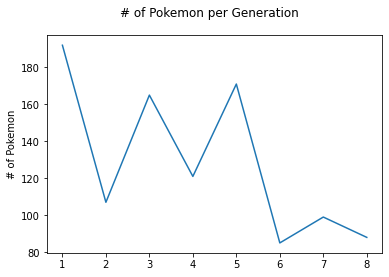

In [ ]:
#Another question I had was if the total # of pokemon per generation has been increasing
#I assume they will decrease due to the company wanting to keep deisgns original
totalnum = df.groupby('generation').count()
fig, ax1 = plt.subplots(1)
fig.suptitle("# of Pokemon per Generation")
ax1.plot(totalnum.name)
ax1.set_ylabel("# of Pokemon")

## **Final Deliverable**

Your final submission should consist of captioned visualizations detailing your most important insights. You will also work on writing and posting a blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.